# 1.Numpy进阶

如果有问题请在群里讨论，题意问题请@姜腾

ddl周六（3.26）23:59，提交前请自己重启kernel运行一遍，只提交ipynb文件，不要把数据和照片打包，代码也不要把图片保存（不要imsave,只要imshow）

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1.1 Cauchy Matrix（1.5分）

Cauchy矩阵是一种在多个领域（控制论，插值，矩阵论）都有广泛应用的矩阵，具体定义如下引用自[Wikipedia](https://en.wikipedia.org/wiki/Cauchy_matrix#:~:text=In%20mathematics%2C%20a%20Cauchy%20matrix%2C%20named%20after%20Augustin,n%20matrix%20with%20elements%20aij%20in%20the%20form)：

In mathematics, a Cauchy matrix, named after Augustin Louis Cauchy, is an $m \times n$ matrix with elements $a_{i j}$ in the form
$$
a_{i j}=\frac{1}{x_{i}-y_{j}} ; \quad x_{i}-y_{j} \neq 0, \quad 1 \leq i \leq m, \quad 1 \leq j \leq n
$$
where $x_{i}$ and $y_{j}$ are elements of a field $\mathcal{F}$, and $\left(x_{i}\right)$ and $\left(y_{j}\right)$ are injective sequences (they contain distinct elements).

特别的，大家喜闻乐见的希尔伯特矩阵就是在$x_{i}-y_{j}=i+j-1$条件下的一种特殊Cauchy矩阵。

本题要求用两种方法：Ufunc和nditer两种方式实现示例的Cauchy矩阵计算，并将输出打印。

In [2]:
A = np.arange(5).reshape(5,1) + 4
B = np.arange(3).reshape(1,3)

In [3]:
# 使用ufunc，TODO
cau1 = 1/np.subtract.outer(A, B)
cau1

array([[[[0.25      , 0.33333333, 0.5       ]]],


       [[[0.2       , 0.25      , 0.33333333]]],


       [[[0.16666667, 0.2       , 0.25      ]]],


       [[[0.14285714, 0.16666667, 0.2       ]]],


       [[[0.125     , 0.14285714, 0.16666667]]]])

In [4]:
# 使用nditer，TODO
cau2 = np.array([[1/(x-y) for y in np.nditer(B)] for x in np.nditer(A)])
cau2

array([[0.25      , 0.33333333, 0.5       ],
       [0.2       , 0.25      , 0.33333333],
       [0.16666667, 0.2       , 0.25      ],
       [0.14285714, 0.16666667, 0.2       ],
       [0.125     , 0.14285714, 0.16666667]])

### 1.2 Element-wise计算的性能分析（1.5分）

以下是一些将一个矩阵每个元素平方的函数实现。结合课上内容，查阅资料，总结出5条以上有意义的发现。


如：
1. 用户自定义的ufunc性能不如numpy自带的ufunc，是因为numpy自带函数底层用C实现。

In [5]:
import timeit
from numba import jit
import numpy as np

data = np.random.randint(10, size=(500, 300))

def pow_build_in(d):
    return data*data

def pow_ufunc(d):
    return np.square(d)

def pow_my_ufunc(d):
    return np.frompyfunc(lambda x:x*x,1,1)(d)

def pow_loop(d): 
    res = np.zeros_like(d) 
    for i in range(500): 
        for j in range(300): 
            res[i,j]=d[i,j] ** 2 
    return res

@jit
def pow_loop_jit(d): 
    res = np.zeros_like(d) 
    for i in range(500): 
        for j in range(300): 
            res[i,j]=d[i,j] ** 2 
    return res

def pow_loop_per_row(d): 
    res = np.zeros_like(d) 
    for i in range(500): 
        res[i,:] = d[i,:] ** 2 
    return res

@jit
def pow_loop_per_row_jit(d): 
    res = np.zeros_like(d) 
    for i in range(500): 
        res[i,:] = d[i,:] ** 2 
    return res

def pow_nditer_default(d):
    res = np.zeros_like(d) 
    it = np.nditer([d, res], op_flags=['readwrite']) 
    for i, r in it:
        r[...] = i ** 2 
    return res 

def pow_nditer_multi(d):
    res = np.zeros_like(d) 
    it = np.nditer([d, res], flags =['multi_index'], op_flags=['readwrite']) 
    for i, r in it: 
        r[...] = i ** 2 
    return res 

def pow_nditer_ext_by_C(d): 
    d = np.array(d, order = 'C') 
    res = np.zeros_like(d, order = 'C') 
    it = np.nditer([d, res], flags = ['external_loop'], op_flags=['readwrite'], order='C') 
    for i, r in it: 
        r[...] = i ** 2 
    return res 

def pow_nditer_ext_by_F(d): 
    d = np.array(d, order = 'F') 
    res = np.zeros_like(d, order = 'F') 
    it = np.nditer([d, res], flags = ['external_loop'], op_flags=['readwrite'], order='F') 
    for i, r in it: 
        r[...] = i ** 2 
    return res 

def pow_nditer_ext_bad(d):  
    d = np.array(d, order = 'C') 
    res = np.zeros_like(d, order = 'C') 
    it = np.nditer([d, res], flags = ['external_loop'], op_flags=['readwrite'], order='F') 
    for i, r in it: 
        r[...] = i ** 2 
    return res 


%timeit pow_build_in(data)
%timeit pow_ufunc(data)
%timeit pow_my_ufunc(data)
%timeit pow_loop(data)
%timeit pow_loop_jit(data)
%timeit pow_loop_per_row(data)
%timeit pow_loop_per_row_jit(data)
%timeit pow_nditer_default(data)
%timeit pow_nditer_multi(data)
%timeit pow_nditer_ext_by_C(data)
%timeit pow_nditer_ext_by_F(data)
%timeit pow_nditer_ext_bad(data)

139 µs ± 10.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
114 µs ± 1.15 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
20.6 ms ± 484 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
95.7 ms ± 1.78 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
71.6 µs ± 22.9 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.16 ms ± 102 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
226 µs ± 30.9 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
210 ms ± 5.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
222 ms ± 11.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
992 µs ± 19.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.07 ms ± 36.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.5 ms ± 36.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


输入你的发现：\
1、无论是用户自定义的ufunc还是numpy自带的ufunc，性能都比for循环好，因为ufunc告诉cpu这是矩阵计算，cpu可以加快矩阵运算速度（比如并行等），而纯粹的for不能让cpu进行优化；而且，numpy使用了很多在低级库上的优化（比如快速求反平方根方法），效率较高\
2、通过numba编译器可以将python和numpy语句通过优化转化为本地机器语言，显著提高python函数面向数组的运算速度\
3、一整行一整行进行计算时速度比以元素为单位的计算速度快，推测可能是加入了并行计算（与第1点类似）或提高了cache的命中率\
4、可以将以行为单位计算和numba编译器结合起来加快计算速度\
5、仅使用nditer计算效率较低，当显式设置数组排列规则（比如按照C或者Fortran规则排列）可以大幅加快计算，因为C和Fortran对矩阵的计算有自身的优化\
6、当数组排列规则和nditer遍历规则不同时，由于排列方式不同，对计算的优化程度会打折扣

# 2.PCA 与 KMeans


### 2.1 债券yield curve的降维与重建：(4分)

PCA在各个领域的应用十分广泛，比如我们喜闻乐见的金融领域。我们都知道债券这种金融产品有各种期限结构，比如三个月后，一年后或者三十年后到期。

同时我们还知道债券有收益率（[bond yield](https://wiki.mbalib.com/wiki/Bond_yield)）这种属性，但是完成本次作业不用知道它到底是个啥，只需要知道它在金融领域里十分重要。

我们把每一天的数据想象成一个样本（Sample），这一天的各个期限的债券的收益率当成特征（Feature），就构成了我们基本问题。

In [1]:
import pandas as pd
import numpy as np

In [2]:
# 载入数据集，不用操作
maturities=list(range(1,31))

path='./YC-dataset.csv'

dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
yields_df = (pd.read_csv(path,index_col='TIME_PERIOD',parse_dates=['TIME_PERIOD'],date_parser=dateparse)).iloc[:,9:] # 不要月度的

display(yields_df)

<ipython-input-2-db8264264d7d>:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')


,Yield 1Y,Yield 2Y,Yield 3Y,Yield 4Y,Yield 5Y,Yield 6Y,Yield 7Y,Yield 8Y,Yield 9Y,Yield 10Y,...,Yield 21Y,Yield 22Y,Yield 23Y,Yield 24Y,Yield 25Y,Yield 26Y,Yield 27Y,Yield 28Y,Yield 29Y,Yield 30Y
TIME_PERIOD,,,,,,,,,,,,,,,,,,,,,
2004-09-06,2.298838,2.641262,2.951578,3.223235,3.457222,3.657429,3.828505,3.974939,4.100712,4.209220,...,4.808953,4.836016,4.860795,4.883558,4.904536,4.923925,4.941896,4.958596,4.974153,4.988680
2004-09-07,2.328891,2.679766,2.987293,3.252486,3.479518,3.673463,3.839294,3.981472,4.103839,4.209626,...,4.798185,4.824870,4.849308,4.871763,4.892459,4.911590,4.929323,4.945804,4.961158,4.975495
2004-09-08,2.346666,2.706542,3.016998,3.282196,3.507894,3.699959,3.863753,4.003922,4.124390,4.228419,...,4.805488,4.831593,4.855497,4.877459,4.897700,4.916408,4.933749,4.949863,4.964876,4.978894
2004-09-09,2.308988,2.646224,2.945649,3.206136,3.430628,3.623456,3.789113,3.931745,4.054972,4.161872,...,4.763395,4.790922,4.816145,4.839332,4.860711,4.880479,4.898808,4.915844,4.931719,4.946545
2004-09-10,2.271566,2.589654,2.884699,3.146724,3.374729,3.571385,3.740559,3.886214,4.011975,4.120981,...,4.732636,4.760578,4.786181,4.809716,4.831415,4.851478,4.870080,4.887372,4.903483,4.918530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-11,-0.695685,-0.736587,-0.742015,-0.721247,-0.682578,-0.632747,-0.576889,-0.518722,-0.460807,-0.404815,...,-0.004521,0.016114,0.035088,0.052575,0.068729,0.083685,0.097566,0.110478,0.122514,0.133759
2019-10-14,-0.685560,-0.729403,-0.737113,-0.718293,-0.681391,-0.633212,-0.578914,-0.522217,-0.465682,-0.410976,...,-0.019410,0.000780,0.019346,0.036456,0.052262,0.066896,0.080478,0.093112,0.104889,0.115892
2019-10-15,-0.679990,-0.718825,-0.727927,-0.712891,-0.680158,-0.635631,-0.584153,-0.529421,-0.474097,-0.419996,...,-0.022825,-0.002070,0.017025,0.034631,0.050899,0.065965,0.079951,0.092961,0.105091,0.116424


从上面看来，我们有3868个样本，30个特征（1年到期的债券收益率到30年到期的债券收益率），但是这个特征太多了，我们想通过PCA提取不同期限的共同特征，这样在将来比如预测债券收益率曲线泛化能力也会提升。

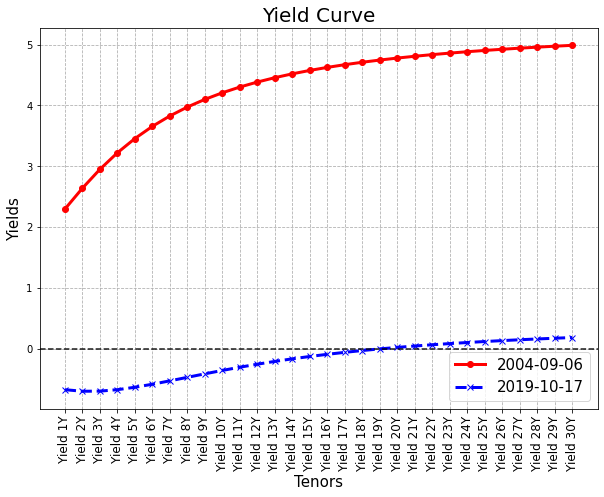

In [6]:
# 以下也是为了帮大家理解本题任务，不用操作
# 画出第一天和第二天的债券收益率曲线
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(yields_df.iloc[0],linestyle='-',marker='o',color='r',lw=3, label='2004-09-06')
ax.plot(yields_df.iloc[-1],linestyle='--',marker='x',color='b',lw=3, label='2019-10-17')
ax.axhline(y=0,ls='--',c='k',alpha=0.9)
ax.grid(linestyle='--')
ax.legend(loc = 'lower right', frameon=True, fontsize=15)
ax.xaxis.set_tick_params(rotation=90,labelsize=12)
ax.set_xlabel('Tenors', fontsize=15)
ax.set_ylabel('Yields', fontsize=15)
ax.set_title('Yield Curve', fontsize=20)
yields = yields_df.to_numpy() # 可以选择用numpy，也建议用numpy

### 2.1.1 用PCA提取主成分：（记得数据标准化，可以考虑用sklearn.preprocessing模块）

In [73]:
# todo
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
yields_std = scaler.fit_transform(yields)
cov2 = np.cov(yields_std.T)
eigenvalues, eigenvectors = np.linalg.eig(cov2)
eig_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i])
             for i in range(len(eigenvalues))]
eig_pairs.sort(key = lambda x:x[0], reverse=True)
eigenvalues = np.array([x[0] for x in eig_pairs])
eigenvectors = np.array([x[1] for x in eig_pairs]).T
print(eigenvalues)

[2.91526179e+01 8.01109344e-01 3.88411588e-02 1.19882245e-02
 2.90473076e-03 2.76360592e-04 1.79762230e-05 2.10879690e-06
 1.04462353e-07 7.92435241e-09 3.87195983e-10 1.95299549e-11
 7.24615307e-13 3.36580704e-14 1.36508686e-15 9.21320605e-16
 8.77593124e-16 7.44950473e-16 7.10255588e-16 5.83709978e-16
 4.71695307e-16 3.99069104e-16 3.67659226e-16 3.44363181e-16
 2.60048717e-16 1.24103323e-16 8.00843418e-17 6.05997660e-17
 3.82907240e-17 1.50909684e-17]


### 2.1.2 绘制前3个主成分随时间的变化图：

In [74]:
# todo
yields_eigen3 = yields_std @ eigenvectors[:,:3]
print(yields_eigen3)

[[-7.09691493 -0.48309223  0.22238747]
 [-7.09381958 -0.42998852  0.20900396]
 [-7.14264394 -0.4072162   0.19099131]
 ...
 [ 9.55790789  1.28939478 -0.26502117]
 [ 9.27013055  1.20385055 -0.24865726]
 [ 9.3275641   1.23589687 -0.26422464]]


Text(0.5, 1.0, 'Curve')

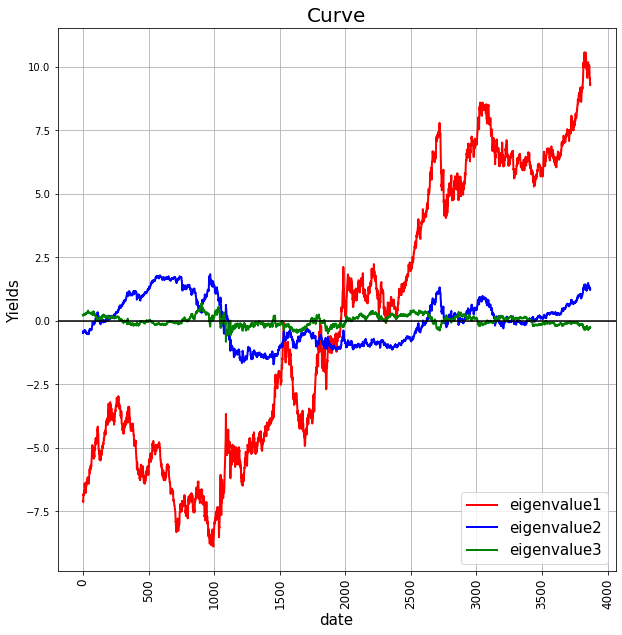

In [75]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(yields_eigen3.T[0],color='r',lw=2, label='eigenvalue1')
ax.plot(yields_eigen3.T[1],color='b',lw=2, label='eigenvalue2')
ax.plot(yields_eigen3.T[2],color='g',lw=2, label='eigenvalue3')
ax.axhline(y=0,ls='-',c='k')
ax.grid(linestyle='-')
ax.legend(loc = 'lower right', frameon=True, fontsize=15)
ax.xaxis.set_tick_params(rotation=90,labelsize=12)
ax.set_xlabel('date', fontsize=15)
ax.set_ylabel('Yields', fontsize=15)
ax.set_title('Curve', fontsize=20)

In [12]:
#测试
#yields_df @ eigenvectors[:,:3] @ eigenvectors[:,:3].T

### 2.1.3 计算每个主成分解释的方差，并以合理的可视化。

Text(0, 0.5, 'variance')

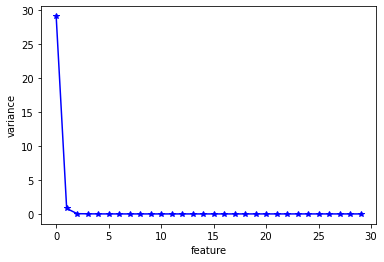

In [76]:
# todo
var = [i for i in eigenvalues]
x = list(range(eigenvalues.shape[0]))
fig, ax = plt.subplots()
ax.plot(x, var, color='b', marker='*')
ax.set_xlabel('feature')
ax.set_ylabel('variance')

### 2.1.4 绘制前三个特征向量(横轴为30个期限，纵轴为对应期限在前三个特征方向上的载荷)：

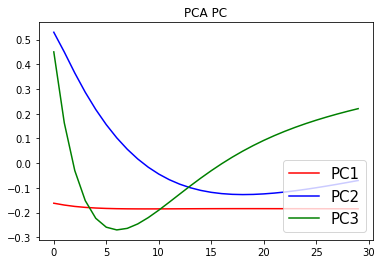

In [77]:
# todo
x = list(range(30))
y1 = eigenvectors[:,0]
y2 = eigenvectors[:,1]
y3 = eigenvectors[:,2]
fig, ax = plt.subplots()
ax.plot(x, y1, color='r', label='PC1')
ax.plot(x, y2, color='b', label='PC2')
ax.plot(x, y3, color='g', label='PC3')
ax.set_title('PCA PC')
ax.legend(loc = 'lower right', frameon=True, fontsize=15)

### 2.1.5 分别用第1个，前2个，前3个因子重建最近一天（2019年10月17日）的yield curve.

对比三张图：你能给每个PC取个名字吗？（不算分，经管同学可以好好想想）

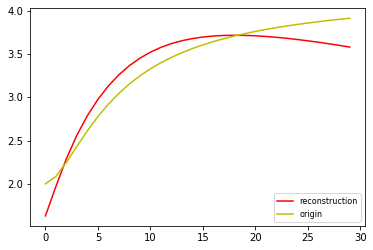

In [93]:
import random
t = random.randint(0, yields.shape[0]-1)
x = list(range(30))

def reconstruction(num):
    yields_recon = yields @ eigenvectors[:,:num] @ eigenvectors[:,:num].T
    fig, ax = plt.subplots()
    ax.plot(x, yields_recon[t],color='r', label='reconstruction')
    ax.plot(x, yields[t], color='y', label='origin')
    ax.legend(loc = 'lower right', frameon=True, fontsize=8)

reconstruction(2)

### 2.2 numpy综合与聚类：图片处理与颜色压缩（3分）

计算机图形学中，颜色可以被量化为颜色空间。彩色图像一般有红绿蓝三个通道，每个通道取值通常为0~255。如果两个像素点只是在单个通道只有细微差异（例如R197G255B25和R198G255B25），在存储上也是不同的，但从观感来讲这两种色彩对我们来说基本没有区别。色彩量化就是找到一些具有代表性的颜色（16,32,64种）来表示全图像，量化前每个像素需要3bytes存储，量化后只需要存储其色彩标号，为1个byte。因此使得需要的存储空间大大减小。

首先我们有一张猫猫图，来自于北大猫协的公众号。


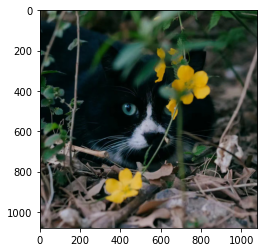

In [16]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

plt.figure()
img = plt.imread('./cat.jpeg')
plt.imshow(img)

把颜色分布画在3维坐标图上，颜色使用点对应的颜色。（本来想出成题的，但是这次就算了）

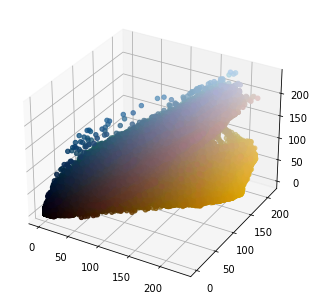

In [17]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
shape = img.shape
I = img.reshape(shape[0]*shape[1], shape[2])
ax.scatter(I[:,0],I[:,1],I[:,2],c=I.reshape(-1, 3)/255)
plt.show(ax)

##### 想法一（naive approach）：计算特定颜色的使用次数，并使用最常见的颜色进行量化（量化到16色）


1. 加载图片
2. 找出独特颜色的数量及其频率
3. 找到出现频率最高的16个颜色（考察numpy操作）
4. 用最接近的颜色替换原始图像中的颜色（计算距离，可以使用scipy.spatial包）
5. 展示

In [18]:
# todo
from scipy import spatial

def cal(x, y):
    listx = [x/65536, x/256%256, x%256]
    listy = [y/65536, y/256%256, y%256]
    return spatial.distance.cityblock(listx, listy)

img = plt.imread('./cat.jpeg')
img = np.dot(img, np.array([65536, 256, 1]))
unique, count = np.unique(img, return_counts=True)
count_pair = [(unique[i], count[i]) for i in range(len(unique))]
count_pair.sort(key=lambda x:x[1], reverse=True)
counts_p = [count_pair[x][0] for x in range(16)]
max_16 = np.array([np.array([x/65536, x/256%256, x%256]) for x in counts_p])
max_16 = max_16.astype(int)

In [19]:
dic = {}
for x in unique:
    dic[x] = max_16[np.argmin(np.array([cal(x, y) for y in counts_p]))]

In [20]:
lst = []
for x in np.nditer(img, op_flags=["readwrite"]):
    lst.append(dic[int(x)])
img_new2 = np.array(lst)
img_new2 = img_new2.reshape(1080, 1080, 3)

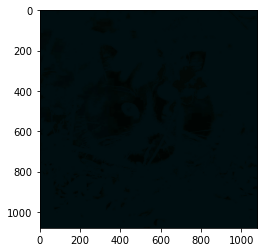

In [21]:
plt.imshow(img_new2)

把量化后的16个颜色分布画在3维坐标图上，颜色使用点对应的颜色。（本来想出成题的，但是这次就算了）

In [22]:
from mpl_toolkits.mplot3d import Axes3D


##### 想法二（sophisticated approach）：K-Means

可以看到上面的方法颜色的失真十分严重，这是因为一些颜色比较微小的变化可能在原始图像中被过度表达，因此将出现在最常见的颜色中。从颜色空间中也可以看出来。我们需要另一种方法：也就是我们课上讲过的kmeans方法。寻找16个“颜色质心”，周围点用质心替代。可以调包，也可以自己实现。请在如下的block中实现。

In [23]:
# todo
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
img = plt.imread('./cat.jpeg')
img2 = img.reshape((img.shape[0]*img.shape[1], 3))

In [24]:
km = KMeans(n_clusters=16)
km.fit(img2)

KMeans(n_clusters=16)

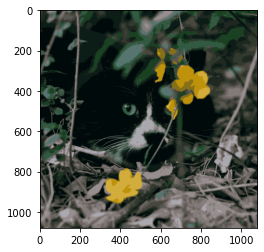

In [31]:
img_predict = km.predict(img2)
center = km.cluster_centers_
center = center.astype(int)
img_new = np.array(center[img_predict])
img_new = np.reshape(img_new, (img.shape[0], img.shape[1], 3))
#img_new = np.round(img_new)
#img_new = img_new.astype(int)
plt.imshow(img_new)

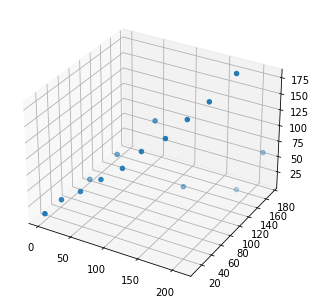

In [34]:
from mpl_toolkits.mplot3d import Axes3D
# 这里面的centroids是我存的颜色质心，你完全可以自己定义。看到角落的黄色被捕捉到了。

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(center[:,0], center[:,1], center[:,2])

### 附加题：PCA的另类用法（2分）

在著名的神经网络论文AlexNet中曾提出了一种使用PCA进行数据增强的算法，称之为PCA jitter。所谓数据增强，就是通过对训练数据人为的加噪声，提高模型鲁棒性与预测能力的方法。从观感来讲，PCA jitter近似对光效的变化，对比直接对RGB通道进行加噪声会获得更少的颜色的失真。请尝试按如下步骤对猫猫图基于PCA进行augmentation，生成4个结果并展示。


1. 将图片按照RGB三通道标准化，均值为0，方差为1。
2. 将图片按照channel展平成大小为(*, 3)的array
3. 对上述array求协方差矩阵
4. 对协方差矩阵进行特征分解
5. 对特征值进行“抖动”，抖动幅度自行设定，可以同样从正态分布中抽样
6. 还原图片（想想如何还原？需要进行一些数学推演）并展示

如果你能按照上面的步骤操作下来，一定会对PCA有更深刻的理解！(提示：要注意存储颜色的数据类型的转换，可能会踩一些坑，可以多借助网上资料，并参考[原论文](https://proceedings.neurips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf))

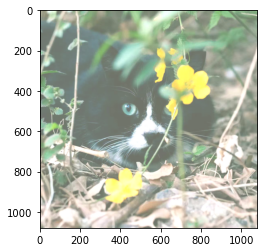

In [24]:
# todo
